# Chicago Crime Annaylsis 

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df = pd.read_csv('./data/Crimes_-_2001_to_Present_20240528.csv', sep=',')

# Overview of Dataset

In [2]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,...,49.0,1.0,08A,NaN,NaN,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,50.0,13.0,01A,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,47.0,5.0,05,1162518.0,1925906.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,6.0,44.0,08B,1183071.0,1847869.0,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)"


In [3]:
df.tail()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
8069316,13047495,JG229914,04/18/2023 08:00:00 AM,003XX N JEFFERSON ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,42.0,28.0,11,1172269.0,1902384.0,2023,08/19/2023 03:40:26 PM,41.887589,-87.642827,"(41.887589411, -87.642826595)"
8069317,13168300,JG373901,08/07/2023 06:00:00 PM,0000X W 95TH ST,031A,ROBBERY,ARMED - HANDGUN,SIDEWALK,False,False,...,9.0,49.0,03,1177527.0,1841973.0,2023,08/19/2023 03:40:26 PM,41.721698,-87.625345,"(41.72169837, -87.625345212)"
8069318,13114024,JG309527,06/20/2023 07:00:00 PM,031XX S AVERS AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,22.0,30.0,07,1151205.0,1883542.0,2023,08/19/2023 03:40:26 PM,41.836324,-87.720674,"(41.836323827, -87.720674149)"
8069319,13188860,JG398340,08/26/2023 12:00:00 AM,078XX S SOUTH SHORE DR,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,7.0,46.0,14,1198338.0,1853426.0,2023,09/02/2023 03:41:45 PM,41.752631,-87.548737,"(41.752631346, -87.548737069)"
8069320,13126372,JG324067,07/01/2023 07:29:00 PM,005XX S WELLS ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,True,...,34.0,32.0,14,1174805.0,1897873.0,2023,08/19/2023 03:40:26 PM,41.875155,-87.633649,"(41.87515458, -87.633648765)"


In [4]:
df.size

177525062

In [5]:
df.shape

(8069321, 22)

In [6]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [7]:
df_filtered = df.copy()

# Data Anaylsis

In [8]:
del df_filtered['IUCR']
del df_filtered['X Coordinate']
del df_filtered['Y Coordinate']
del df_filtered['Updated On']
del df_filtered['Block']

I deleted IUCR because it is the reporting code and not useful for general people. The x and y coordinates are repetitive because the latitude and longitude is already given. Updated on is useless for data analysis and thee block is redacted so it does not really help with location.

In [9]:
df_filtered.head()

,ID,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Location
0,5741943,HN549294,08/25/2007 09:22:18 AM,ASSAULT,SIMPLE,OTHER,False,False,2422,24.0,49.0,1.0,08A,2007,NaN,NaN,NaN
1,25953,JE240540,05/24/2021 03:06:00 PM,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,2515,25.0,36.0,19.0,01A,2021,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,26038,JE279849,06/26/2021 09:24:00 AM,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,1711,17.0,50.0,13.0,01A,2021,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,13279676,JG507211,11/09/2023 07:30:00 AM,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,1922,19.0,47.0,5.0,05,2023,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,13274752,JG501049,11/12/2023 07:59:00 AM,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,632,6.0,6.0,44.0,08B,2023,41.737751,-87.604856,"(41.737750767, -87.604855911)"


Text(0, 0.5, 'Number of Crimes by the Millions')

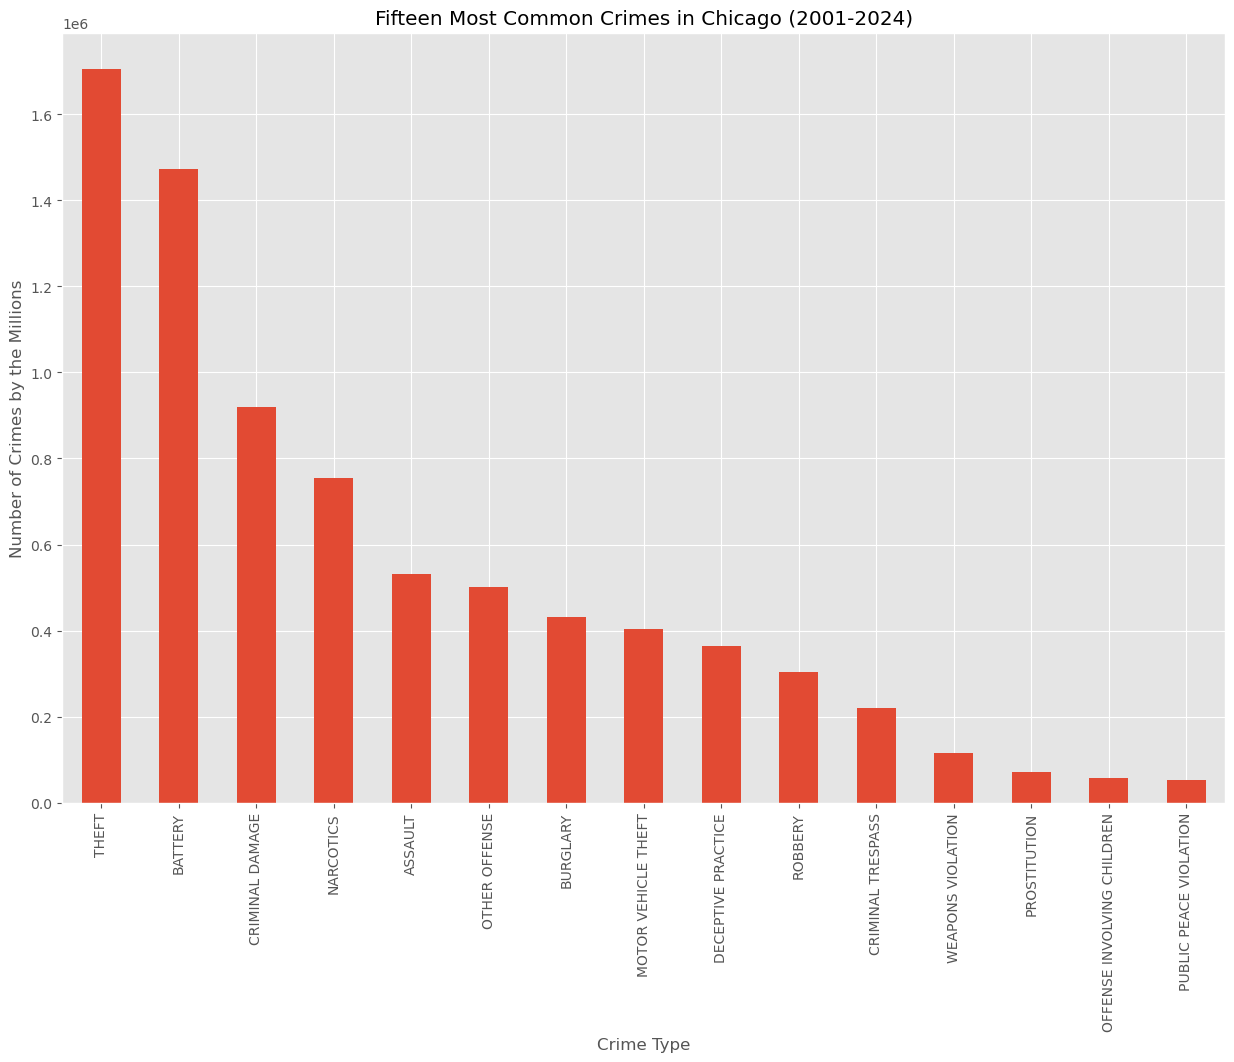

In [10]:
plt.style.use('ggplot')
g = df_filtered['Primary Type'].value_counts(sort=True)[:15].plot.bar(figsize=(15,10))
plt.title('Fifteen Most Common Crimes in Chicago (2001-2024)')
plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes by the Millions')

This graph shows the fifteen most common crimes with the scale going by the millions. 

In [11]:
df_filtered.groupby(['Year'])['Primary Type'].count()

Year
2001    485912
2002    486820
2003    475989
2004    469430
2005    453779
2006    448188
2007    437089
2008    427197
2009    392841
2010    370537
2011    352008
2012    336332
2013    307561
2014    275834
2015    264841
2016    269892
2017    269172
2018    269003
2019    261468
2020    212413
2021    209219
2022    239364
2023    261834
2024     92598
Name: Primary Type, dtype: int64

This groupby shows the number of crimes per year for the past 23 years. 

In [12]:
df_filtered.groupby(['Location Description'])['Primary Type'].value_counts(sort=True)


Location Description  Primary Type                     
ABANDONED BUILDING    NARCOTICS                            3013
                      BURGLARY                             1961
                      CRIMINAL TRESPASS                    1695
                      THEFT                                1583
                      CRIMINAL DAMAGE                      1129
                                                           ... 
WAREHOUSE             CONCEALED CARRY LICENSE VIOLATION       1
                      GAMBLING                                1
WOODED AREA           HOMICIDE                                7
YARD                  HOMICIDE                              311
YMCA                  HOMICIDE                                3
Name: count, Length: 3197, dtype: int64

This is the amount of different crimes committed in different types of locations.

In [13]:
df_filtered.groupby(['Arrest'])['Domestic'].value_counts(sort=True)


Arrest  Domestic
False   False       4880093
        True        1118493
True    False       1801271
        True         269464
Name: count, dtype: int64

This is a breakdown of arrest amounts vs. domestic amounts.

Text(0, 0.5, 'Number of Crimes')

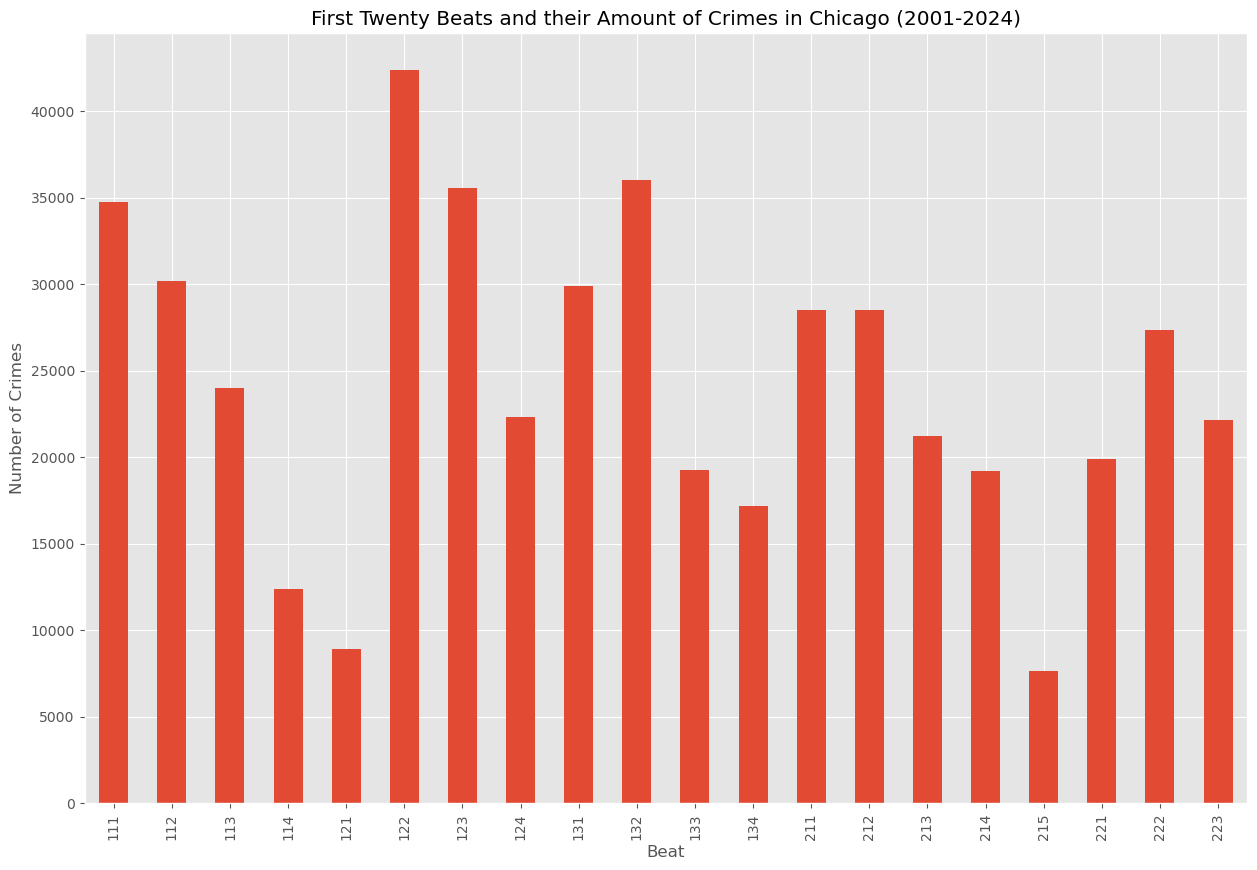

In [27]:
df_filtered.groupby(['Beat'])['Primary Type'].count()[:20].plot.bar(figsize=(15,10))
plt.title('First Twenty Beats and their Amount of Crimes in Chicago (2001-2024)')
plt.xlabel('Beat')
plt.ylabel('Number of Crimes')

This graph shows the first twenty beats or the path officers walk and ther amount of crimes that occur their. 